# Build a spaCy Processing Pipeline



In [20]:
!pip install spacy
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


#Exercise #1:  Load Resources

In [21]:
#EXERCISE - Load spaCy Resources


import pandas as pd
import spacy
#Install spaCy

#Download the English language model for spaCy
!python -m spacy download en_core_web_sm

#Load the English model
nlp = spacy.load("en_core_web_sm")



  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


When you execute nlp = spacy.load('en'), spaCy downloads and loads the pre-trained English language model into memory and assigns it to the variable nlp. This pre-trained model contains information about word vectors, part-of-speech tags, syntactic dependencies, and other linguistic features necessary for various NLP tasks.

##spaCy Procesing Pipeline

In spaCy, the order of tasks in the processing pipeline generally follows a predefined sequence, although it's also customizable. By default, spaCy's processing pipeline includes the following components in the specified order:



### Order of Tasks in the Processing Pipeline

| Order | Name         | Definition |
| :-----| :------ |: ---- |
| 1     | Tokenization | Input text is split into individual tokens, such as words and punctuation marks. |
| 2     | Stop Words    | Removes stop words from the text. |
| 3     | POS Tagging   | Assigns grammatical labels (e.g., noun, verb, adjective) to each token in the text based on its syntactic role within the sentence. |
| 4     | Dependency Parsing| Analyzes the grammatical structure of the text by determining the relationships |
| 5     |Lemmatization | Reduces tokens to their base or root form (lemmas)  |
| 6     |  Named Entity Recognition|  Identifies, categorizes persons, organizations, locations, dates, etc.|
| 7     | Other Use Case Tasks| May be included in pipelne (Sentiment Analysis) |


# Exercise #2:  Build a Simple Processing Pipeline

In [32]:
#EXERCISE - Build a Simple Processing Pipeline
import pandas as pd
import spacy
# !python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")

# Keep this
text = "A customer in New York City wants give a review."
doc = nlp(text)


#Processing Pipeline Order
for token in doc:
    print (f"{token.text}")   #Tokenization
#

print()

without_stop_words = [token.text for token in doc if not token.is_stop]     #Stop Words Removal
print(f"removed stoped words list: {without_stop_words}")

print()

#POS Tagging
for token in doc:
    print(f"POS: token: {token.text}, POS_tag: {token.pos_}")              # Iterate through each token and print the token text and its POS tag
#

#Named Entity Recognition
print("Named Entity Recognition (NER):")
for ent in doc.ents:
    print(f"ent.txt: {ent.text}, ent.label_: {ent.label_}")                 # Iterate through each named entity in the processed text and print its text and label
#

print()

#Lemmatization
print("Lemmatization:")
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
print(f"lemmatized_tokenss list: {lemmatized_tokens}")





A
customer
in
New
York
City
wants
give
a
review
.

removed stoped words list: ['customer', 'New', 'York', 'City', 'wants', 'review', '.']

POS: token: A, POS_tag: DET
POS: token: customer, POS_tag: NOUN
POS: token: in, POS_tag: ADP
POS: token: New, POS_tag: PROPN
POS: token: York, POS_tag: PROPN
POS: token: City, POS_tag: PROPN
POS: token: wants, POS_tag: VERB
POS: token: give, POS_tag: VERB
POS: token: a, POS_tag: DET
POS: token: review, POS_tag: NOUN
POS: token: ., POS_tag: PUNCT
Named Entity Recognition (NER):
ent.txt: New York City, ent.label_: GPE

Lemmatization:
lemmatized_tokenss list: ['a', 'customer', 'in', 'New', 'York', 'City', 'want', 'give', 'a', 'review']


In [36]:
!pwd

/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 2


#Exercise #3: Build a Processing Pipeline with a File

In [39]:
# Run this cell

file_path = '/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 2/sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()
    print(sentiment_texts)


['"I love the new features of your product! It has greatly improved my productivity."\n', '"The customer support was exceptional in New York. They resolved my issue promptly and professionally."\n', '"The quality of your service exceeded my expectations in Prague. I\'m impressed!"\n', '"I\'m extremely satisfied with my purchase. The product works flawlessly."\n', '"The user interface is intuitive and easy to navigate. Kudos to your design team!"\n', '"I had a positive experience shopping on your website. The checkout process was smooth."\n', '"Your company values customer feedback, and it shows in the improvements you\'ve made."\n', '"The pricing is fair, and the value I get in return is fantastic."\n', '"I appreciate the personalized recommendations. It makes shopping more convenient."\n', '"The delivery was prompt, and the packaging was secure. Everything arrived in perfect condition."']


In [54]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Initialize empty lists to store the results
token_lists = []
filtered_token_lists = []
pos_tag_lists = []
ner_lists = []

#-----------------------------------------------------------------------------
# START HERE
print(sentiment_texts)
# Process each sentiment example using spaCy and store the results
for sentiment_text in sentiment_texts:
    #doc = nlp(sentiment_text)
    doc = nlp(sentiment_text.strip())       # Strip any leading/trailing whitespace

    # Tokenization
    tokens = [token.text for token in doc]  # Extract tokens from the processed text
    token_lists.append(tokens)              # Append tokens list to token_lists
    #print(f"token_lists: {token_lists}")

    # Stop Word Removal filter
    filtered_tokens = [token.text for token in doc if not token.is_stop]  # Filter out stop words
    filtered_token_lists.append(filtered_tokens)  # Append filtered tokens list to filtered_token_lists
    #print(f"filtered_token_list: {filtered_token_lists}")

    # Part-of-Speech Tagging (POS tagging)
    pos_tags = [(token.text, token.pos_) for token in doc]  # Extract token text and POS tags
    pos_tag_lists.append(pos_tags)  # Append POS tags list to pos_tag_lists
    #print(f"pos_tag_lists: {pos_tag_lists}")

    # Named Entity Recognition (NER)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract named entities and their labels
    ner_lists.append(ner_entities)  # Append named entities list to ner_lists
    #print(f"ner_lists: {ner_lists}")
    #OUT: 
    # ner_lists: [[]]
    # ner_lists: [[], [('New York', 'GPE')]]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')]]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], [], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], [], [], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], [], [], [], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], [], [], [], [], []]
    # ner_lists: [[], [('New York', 'GPE')], [('Prague', 'GPE')], [], [], [], [], [], [], []]

#

#-----------------------------------------------------------------------------
#Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)


['"I love the new features of your product! It has greatly improved my productivity."\n', '"The customer support was exceptional in New York. They resolved my issue promptly and professionally."\n', '"The quality of your service exceeded my expectations in Prague. I\'m impressed!"\n', '"I\'m extremely satisfied with my purchase. The product works flawlessly."\n', '"The user interface is intuitive and easy to navigate. Kudos to your design team!"\n', '"I had a positive experience shopping on your website. The checkout process was smooth."\n', '"Your company values customer feedback, and it shows in the improvements you\'ve made."\n', '"The pricing is fair, and the value I get in return is fantastic."\n', '"I appreciate the personalized recommendations. It makes shopping more convenient."\n', '"The delivery was prompt, and the packaging was secure. Everything arrived in perfect condition."']
                                   Sentiment Example  \
0  "I love the new features of your produ

#Exercise #4 (Optional): Exploratory Data Analysis

Perform Data Analysis: You can perform various data analysis tasks on the processed data. For example, you can calculate statistics, count occurrences, or visualize the data using plots and charts.

Export Data to CSV or Excel: If you want to save the processed data for future use or analysis in other tools, you can export the DataFrame to a CSV or Excel file.

In [56]:
results_df.to_csv('processed_data.csv', index=False)
#results_df.to_excel('processed_data.xlsx', index=False)


In [57]:
processed_df = pd.read_csv('/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 2/processed_data.csv', encoding='latin-1')

In [58]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'extremely', 'satisfied', 'purchase', '....","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'user', 'interface', 'intuitive', 'easy'...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


In [62]:
!pip install wordcloud
!pip install matplot


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.4/744.4 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.5 MB/s eta 0:00:00
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9710 sha256=102d2fdda2a8408007f31e90ca3afa20c96e0c91c041539847de7e1a03cdc6d4
  Stored in directory: /home/codespace/.cache/pip/whe

Calculate the count of tokens for each sentiment.

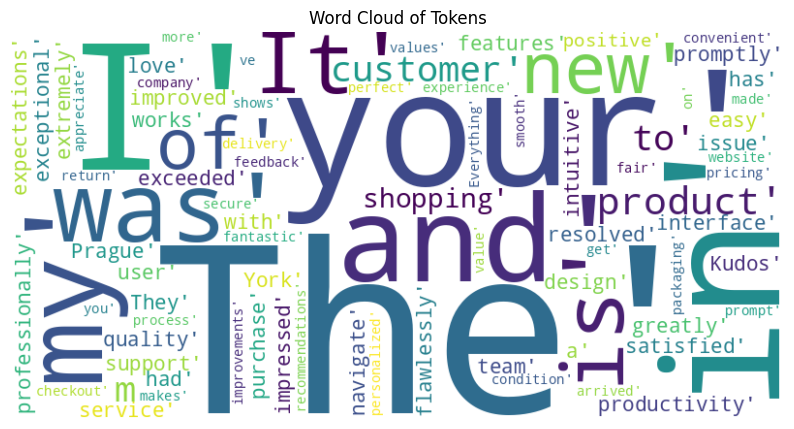

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single text
all_tokens = ' '.join(processed_df['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()


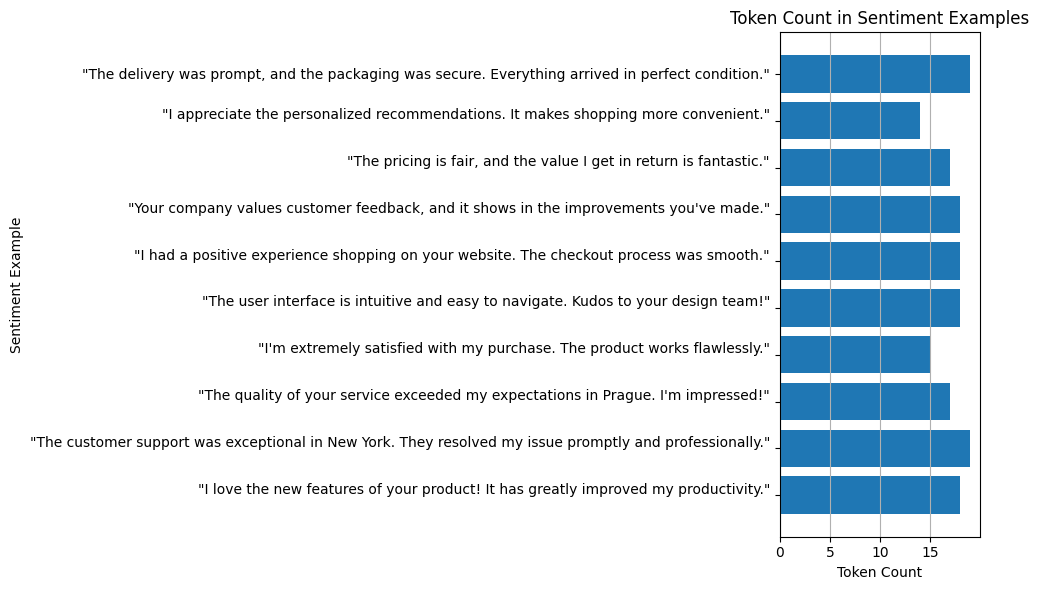

In [66]:
import matplotlib.pyplot as plt

# Load the processed data from the CSV file
file_path = '/workspaces/advanced-nlp-with-python-for-machine-learning-3807097/Chapter 2/processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Histogram of Token Lengths: Visualize the distribution of token lengths in the sentiment examples. This can give insights into the length of words used in the text.

/tmp/ipykernel_14186/1604240985.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


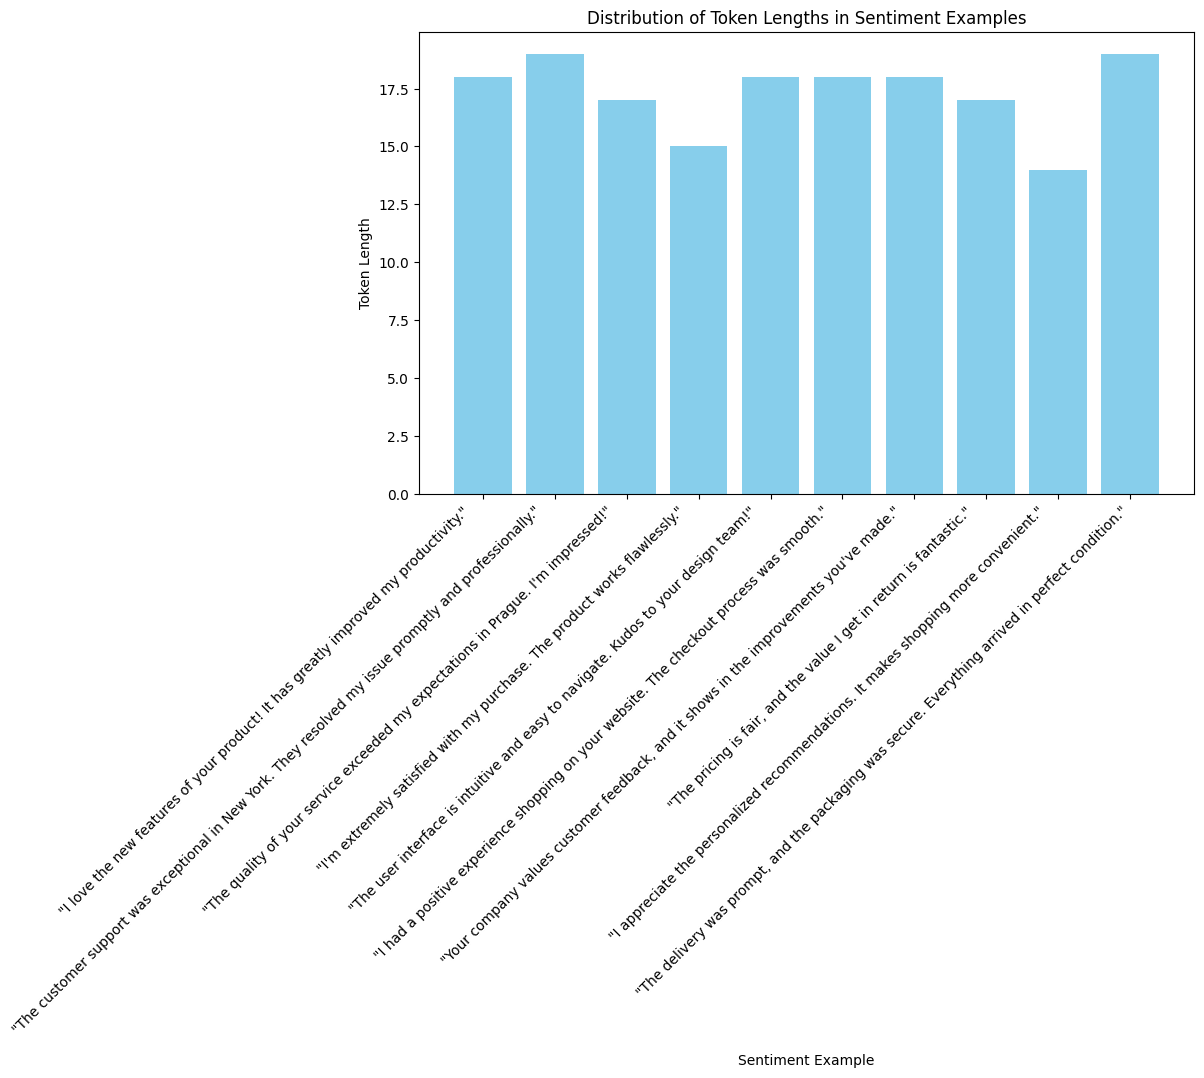

In [67]:
# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()




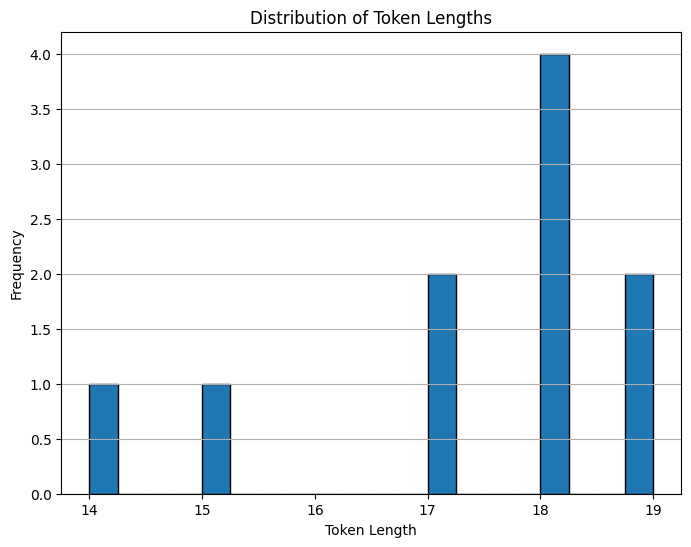

In [68]:
# Calculate token lengths
token_lengths = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(token_lengths, bins=20, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y')
plt.show()


Word Cloud of Tokens: Create a word cloud to visualize the most common words in the sentiment examples. This can highlight frequently used words and themes.